In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
df = pd.read_csv('../../../../data/raw/nb_data/5. outlier_removed/gurgaon_properties_outlier_treated.csv')

In [29]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,3.0,South-West,Relatively New,1735.0,NaN,1500.0,0,0,1,0,0,2,79,500.000000
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,9.0,NaN,New Property,1508.0,NaN,NaN,0,0,0,0,0,2,0,502.666667


In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

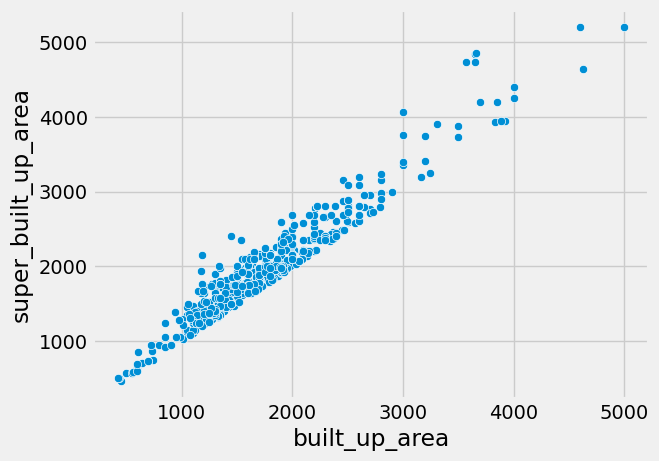

In [31]:
sns.scatterplot(data=df, x='built_up_area', y='super_built_up_area')
plt.show()

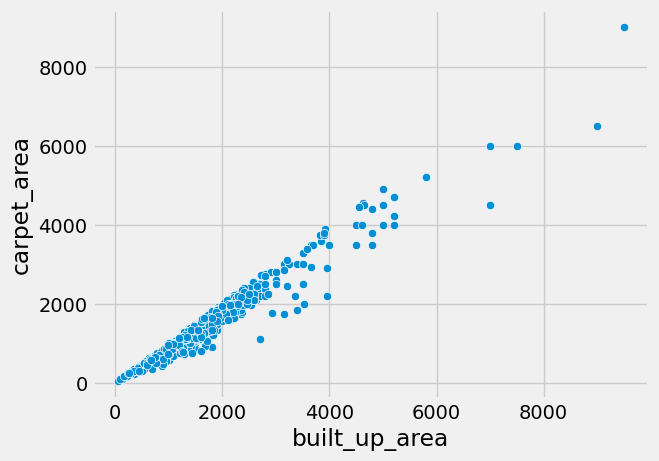

In [32]:
sns.scatterplot(data=df, x='built_up_area', y='carpet_area')
plt.show()

In [33]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

0

In [34]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [35]:
all_present_df.shape

(531, 24)

In [36]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [37]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [38]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [39]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())].copy()

In [40]:
sbc_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,3.0,South-West,Relatively New,1735.0,NaN,1500.0,0,0,1,0,0,2,79,500.0
3,flat,cghs airport apartment,sector 47,1.65,7857.0,2100.0,Super Built up area 2100(195.1 sq.m.)Carpet ar...,3,3,3,1.0,North-East,Old Property,2100.0,NaN,1720.0,0,0,0,0,1,1,136,700.0


In [41]:
sbc_df['built_up_area'] = sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2))

In [42]:
df.update(sbc_df)

In [43]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [44]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())].copy()

In [45]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,9.0,NaN,New Property,1508.0,NaN,NaN,0,0,0,0,0,2,0,502.666667
4,flat,m3m woodshire,sector 107,1.65,5961.0,2768.0,Super Built up area 2768(257.16 sq.m.),4,5,3+,12.0,North-West,Relatively New,2768.0,NaN,NaN,0,1,0,0,0,2,21,692.000000
6,flat,the close north,sector 50,2.51,11992.0,2093.0,Super Built up area 2093(194.45 sq.m.),3,3,3,11.0,North-East,Moderately Old,2093.0,NaN,NaN,0,0,1,1,0,1,109,697.666667
11,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Super Built up area 1650(153.29 sq.m.),3,3,3,2.0,West,Relatively New,1650.0,NaN,NaN,1,1,0,0,0,1,168,550.000000
16,flat,microtek greenburg,sector 86,1.65,8707.0,1895.0,Super Built up area 1895(176.05 sq.m.),3,4,3,8.0,North-West,Relatively New,1895.0,NaN,NaN,0,1,0,0,0,2,124,631.666667


In [47]:
sb_df['built_up_area'] = sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105))

In [48]:
df.update(sb_df)

In [49]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [50]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())].copy()

In [51]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,house,bptp astaire gardens,sector 70a,1.18,8138.0,1450.0,Carpet area: 1450 (134.71 sq.m.),3,3,3+,2.0,North-East,Relatively New,NaN,NaN,1450.0,0,0,0,0,1,1,153,483.333333
9,flat,central park flower valley,sector 33,1.55,11923.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,3,3+,7.0,North-East,New Property,NaN,NaN,1300.0,0,0,0,0,0,1,28,433.333333
21,flat,bestech park view residency,sector 2,0.56,8629.0,649.0,Carpet area: 651 (60.48 sq.m.),1,2,2,7.0,North-East,Moderately Old,NaN,NaN,651.0,0,0,0,0,0,2,92,649.000000
30,flat,vatika inxt floors,sector 82a,1.25,8333.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3,2,3,2.0,North,Relatively New,NaN,NaN,1500.0,1,0,0,1,0,1,94,500.000000
32,flat,raheja atharva,sector 109,2.20,9491.0,2318.0,Carpet area: 2318 (215.35 sq.m.),3,3,2,7.0,North,Moderately Old,NaN,NaN,2318.0,0,1,0,0,0,1,111,772.666667


In [52]:
c_df['built_up_area'] = c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9))

In [53]:
df.update(c_df)

In [54]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

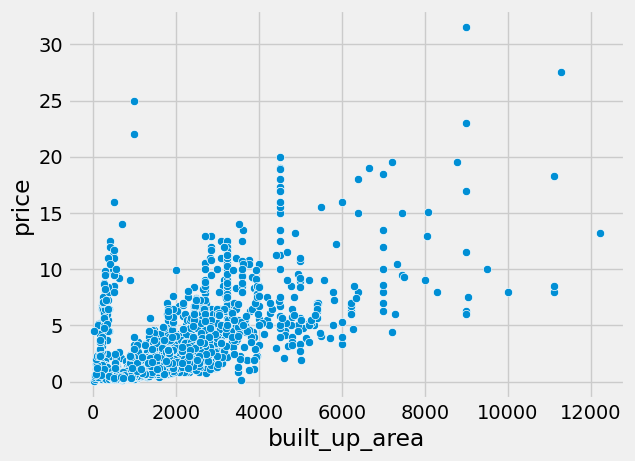

In [55]:
sns.scatterplot(data=df, x='built_up_area', y='price')
plt.show()

In [56]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']].copy()

In [57]:
anamoly_df.sample(5)

,price,area,built_up_area
2946,3.50,1449.0,1449.0
338,2.85,2045.0,1640.0
2228,25.00,8036.0,1000.0
3466,2.90,1557.0,1415.0
932,5.10,3078.0,125.0


In [58]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [59]:
df.update(anamoly_df)

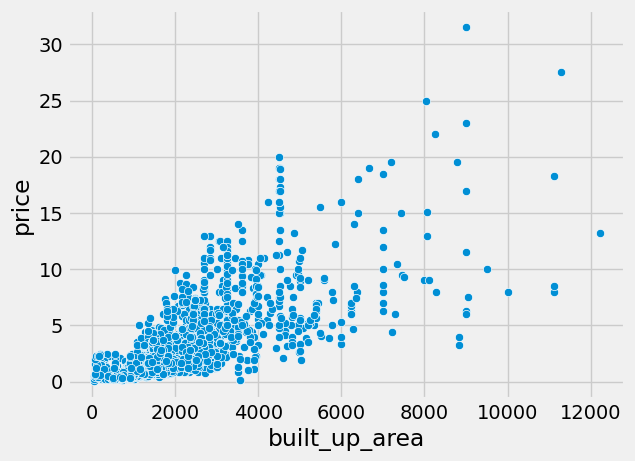

In [60]:
sns.scatterplot(data=df, x='built_up_area', y='price')
plt.show()

In [61]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [62]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,3,3,3,3.0,South-West,Relatively New,1618.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,3,2,3+,9.0,NaN,New Property,1365.0,0,0,0,0,0,2,0
2,house,bptp astaire gardens,sector 70a,1.18,8138.0,3,3,3+,2.0,North-East,Relatively New,1611.0,0,0,0,0,1,1,153
3,flat,cghs airport apartment,sector 47,1.65,7857.0,3,3,3,1.0,North-East,Old Property,1906.0,0,0,0,0,1,1,136
4,flat,m3m woodshire,sector 107,1.65,5961.0,4,5,3+,12.0,North-West,Relatively New,2505.0,0,1,0,0,0,2,21


In [63]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [64]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
121,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,2,0
202,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,0,0
206,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,2,9
261,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,2,0
276,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
656,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,2,0
1226,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,2,21
1270,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,2,0
1662,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,2,59
2075,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,2,0


In [65]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [67]:
df['floorNum'] = df['floorNum'].fillna(2.0)

In [68]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [69]:
1011/df.shape[0]

0.2843881856540084

### facing

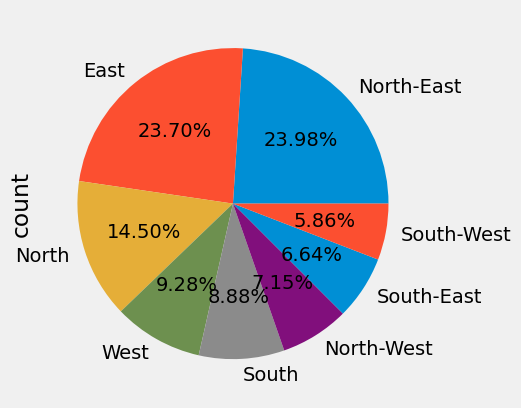

In [70]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [71]:
df.drop(columns=['facing'],inplace=True)

In [72]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2730,house,unitech espace,sector 50,10.30,31790.0,5,6,3+,3.0,Moderately Old,3240.0,1,1,1,1,0,1,160
1406,flat,signature global city 63a,sector 63a,1.65,15264.0,2,2,2,1.0,Under Construction,978.0,0,0,0,0,0,2,0
2019,house,independent,sector 7,2.00,13889.0,2,2,2,2.0,Old Property,1440.0,0,0,0,0,0,2,22
3370,house,rattan vihar rajendra park,dwarka expressway,0.85,14167.0,1,5,3+,4.0,New Property,600.0,0,0,0,0,0,2,0
3402,flat,vatika city,sector 49,1.69,8622.0,3,3,3,3.0,Moderately Old,2178.0,0,0,0,1,0,2,136


In [73]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [74]:
df.shape

(3555, 18)

In [75]:
df.dropna(inplace=True)

In [76]:
df.shape

(3554, 18)

In [77]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [78]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [79]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
27,house,independent,sector 110,0.34,6800.0,1,1,0,1.0,Undefined,500.0,0,0,0,0,0,2,0
31,house,independent,sector 12,2.75,12343.0,6,6,2,2.0,Undefined,2228.0,0,0,0,0,0,2,0
36,flat,signature global park,sohna road,0.75,6938.0,2,2,0,1.0,Undefined,1081.0,0,0,0,0,0,2,58
68,house,independent,sector 105,0.74,7400.0,3,3,0,2.0,Undefined,1000.0,0,0,0,0,0,2,0
84,flat,shapoorji pallonji joyville gurugram,sector 102,0.95,10383.0,2,2,2,14.0,Undefined,915.0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,flat,sidhartha ncr one,sector 95,0.55,5556.0,2,2,3,15.0,Undefined,990.0,0,0,0,0,0,2,0
3492,flat,central park flower valley,sohna road road,1.65,17442.0,3,3,0,1.0,Undefined,1051.0,0,0,0,0,0,2,66
3499,flat,smartworld one dxp,sector 113,2.00,11074.0,3,3,3,12.0,Undefined,1806.0,0,0,0,0,0,2,70
3510,flat,shapoorji pallonji joyville gurugram,sector 102,1.42,10380.0,2,2,3,14.0,Undefined,1368.0,0,0,0,0,0,2,0


In [80]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [81]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [82]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           325
Under Construction     277
Undefined               54
Name: count, dtype: int64

In [83]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [84]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [85]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           328
Under Construction     277
Undefined               34
Name: count, dtype: int64

In [86]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [87]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [88]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         623
New Property           598
Old Property           328
Under Construction     277
Name: count, dtype: int64

In [89]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [90]:
df.shape

(3554, 18)

In [91]:
df.to_csv('../../../../data/raw/nb_data/6. Nan_removed/gurgaon_properties_missing_value_imputation.csv',index=False)